In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
blocks = pd.read_csv('BWND YTD/Final YTD Blocks Data.tsv', 
                 sep='\t',
                 parse_dates=['block_start_datetime_utc', 'block_start_datetime_local'],
                 dtype={
                     'warehouse_id': 'category',
                     'promisewindow': 'category',
                     'duration': 'float32',
                     'guaranteed_earnings_price_per_hr': 'float32',
                     'block_length': 'float32',
                     'wave_mins': 'int16',
                     'promisewindownumber': 'int16'
                 })

print(f"✅ Successfully loaded {len(blocks):,} rows × {len(blocks.columns)} columns")
print(f"📊 Memory usage: {blocks.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
blocks.info()


#Hygenie check was just the sum of BWND without any filters is also 120796. 
#We are using the longer version to preserve a lot of details related to the block


✅ Successfully loaded 3,958,031 rows × 19 columns
📊 Memory usage: 1457.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958031 entries, 0 to 3958030
Data columns (total 19 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   warehouse_id                      category      
 1   service_area_id                   object        
 2   block_start_datetime_utc          datetime64[ns]
 3   block_start_datetime_local        datetime64[ns]
 4   duration                          float32       
 5   guaranteed_earnings_price_per_hr  float32       
 6   block_length                      float32       
 7   date                              object        
 8   block_start_wave                  object        
 9   wave_mins                         int16         
 10  wave_temp                         object        
 11  wave                              object        
 12  promisewindow                     category      
 

In [11]:
uniquewarehouses = blocks['warehouse_id'].nunique()
uniquewarehouses

123

In [12]:
rlp_blocks = pd.read_csv('BWND YTD/RLP YTD Data.tsv', 
                 sep='\t',
                 parse_dates=['block_start_datetime_utc', 'block_start_datetime_local'],
                 dtype={
                     'warehouse_id': 'category',
                     'promisewindow': 'category',
                     'duration': 'float32',
                     'guaranteed_earnings_price_per_hr': 'float32',
                     'block_length': 'float32',
                     'wave_mins': 'int16',
                     'promisewindownumber': 'int16'
                 })

print(f"✅ Successfully loaded {len(rlp_blocks):,} rows × {len(rlp_blocks.columns)} columns")
print(f"📊 Memory usage: {rlp_blocks.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
rlp_blocks.info()



✅ Successfully loaded 468,005 rows × 21 columns
📊 Memory usage: 112.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468005 entries, 0 to 468004
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   warehouse_id                      468005 non-null  category      
 1   service_area_id                   468005 non-null  object        
 2   block_start_datetime_utc          468005 non-null  datetime64[ns]
 3   block_start_datetime_local        468005 non-null  datetime64[ns]
 4   duration                          468005 non-null  float32       
 5   guaranteed_earnings_price_per_hr  468005 non-null  float32       
 6   block_length                      468005 non-null  float32       
 7   block_start_wave                  468005 non-null  object        
 8   wave_mins                         468005 non-null  int16         
 9   promisewindow                 

In [13]:
rlpuniquewarehouses = rlp_blocks['warehouse_id'].nunique()
rlpuniquewarehouses

83

In [15]:
# Get distinct combinations from RLP data
rlp_distinct = rlp_blocks[['warehouse_id', 'service_area_id', 'block_start_datetime_utc', 
                         'block_start_datetime_local', 'duration', 'guaranteed_earnings_price_per_hr',
                         'block_length', 'block_start_wave', 'wave_mins', 'promisewindow', 
                         'promisewindownumber']].drop_duplicates()


In [16]:

# Remove matching rows from blocks data
blocks_filtered = blocks.merge(rlp_distinct, on=['warehouse_id', 'service_area_id', 'block_start_datetime_utc',
                                                      'block_start_datetime_local', 'duration', 'guaranteed_earnings_price_per_hr',
                                                      'block_length', 'block_start_wave', 'wave_mins', 'promisewindow',
                                                      'promisewindownumber'], how='left', indicator=True)

In [17]:

blocks_filtered = blocks_filtered[blocks_filtered['_merge'] == 'left_only'].drop('_merge', axis=1)


In [18]:
blocks_filtered = blocks_filtered.drop(['date', 'wave_temp', 'wave'], axis=1)

In [19]:
combined_data = pd.concat([rlp_blocks, blocks_filtered], ignore_index=True)
combined_data.head()

,warehouse_id,service_area_id,block_start_datetime_utc,block_start_datetime_local,duration,guaranteed_earnings_price_per_hr,block_length,block_start_wave,wave_mins,promisewindow,...,sum_metric_rlp_adds,avg_metric_rlp_adds,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds,sum_checked_in_blocks,sum_attended_blocks,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks
0,VAX3,d310f46a-06d7-41cb-a4f5-3d3190ceeeda,2025-06-17 17:00:00,2025-06-17 10:00:00,300.0,23.0,5.0,10:00,0,LUNCH,...,26.0,1.0,1.0,1.0,1.0,20,20,6,0.0,0
1,VAX3,d310f46a-06d7-41cb-a4f5-3d3190ceeeda,2025-10-26 14:30:00,2025-10-26 07:30:00,270.0,24.0,4.5,07:30,30,BRUNCH,...,1.0,1.0,1.0,1.0,1.0,1,1,0,1.0,0
2,VAX5,9f689ef5-f669-42ed-ad2b-0a00ebbd71c5,2025-01-22 15:45:00,2025-01-22 07:45:00,240.0,24.0,4.0,07:45,45,BRUNCH,...,9.0,1.0,2.0,1.0,1.0,6,6,0,6.0,0
3,VAX7,54947573-75ac-4c49-bec3-ce04cf8ffb70,2025-06-07 02:30:00,2025-06-06 19:30:00,120.0,24.0,2.0,19:30,30,BEDTIME,...,2116.0,46.0,46.0,46.0,46.0,46,45,4,46.0,0
4,VAZ3,80457424-c5c1-49a6-9b12-c4291e194dd1,2025-05-10 11:00:00,2025-05-10 04:00:00,240.0,20.0,4.0,04:00,0,BREAKFAST,...,108.0,1.0,2.0,1.0,1.0,68,66,6,66.0,0


In [20]:

df = combined_data

df['BWND_happened'] = (df['sum_bwnd_blocks'] > 0).astype(int)

# RLP_happened: 1 if sum_metric_rlp_adds > 0, else 0  
df['RLP_happened'] = (df['sum_metric_rlp_adds'] > 0).astype(int)
df.head()

,warehouse_id,service_area_id,block_start_datetime_utc,block_start_datetime_local,duration,guaranteed_earnings_price_per_hr,block_length,block_start_wave,wave_mins,promisewindow,...,max_metric_rlp_adds,min_metric_rlp_adds,avg_max_min_metric_rlp_adds,sum_checked_in_blocks,sum_attended_blocks,sum_bwnd_blocks,sum_surged_blocks,sum_extended_blocks,BWND_happened,RLP_happened
0,VAX3,d310f46a-06d7-41cb-a4f5-3d3190ceeeda,2025-06-17 17:00:00,2025-06-17 10:00:00,300.0,23.0,5.0,10:00,0,LUNCH,...,1.0,1.0,1.0,20,20,6,0.0,0,1,1
1,VAX3,d310f46a-06d7-41cb-a4f5-3d3190ceeeda,2025-10-26 14:30:00,2025-10-26 07:30:00,270.0,24.0,4.5,07:30,30,BRUNCH,...,1.0,1.0,1.0,1,1,0,1.0,0,0,1
2,VAX5,9f689ef5-f669-42ed-ad2b-0a00ebbd71c5,2025-01-22 15:45:00,2025-01-22 07:45:00,240.0,24.0,4.0,07:45,45,BRUNCH,...,2.0,1.0,1.0,6,6,0,6.0,0,0,1
3,VAX7,54947573-75ac-4c49-bec3-ce04cf8ffb70,2025-06-07 02:30:00,2025-06-06 19:30:00,120.0,24.0,2.0,19:30,30,BEDTIME,...,46.0,46.0,46.0,46,45,4,46.0,0,1,1
4,VAZ3,80457424-c5c1-49a6-9b12-c4291e194dd1,2025-05-10 11:00:00,2025-05-10 04:00:00,240.0,20.0,4.0,04:00,0,BREAKFAST,...,2.0,1.0,1.0,68,66,6,66.0,0,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958031 entries, 0 to 3958030
Data columns (total 23 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   warehouse_id                      object        
 1   service_area_id                   object        
 2   block_start_datetime_utc          datetime64[ns]
 3   block_start_datetime_local        datetime64[ns]
 4   duration                          float32       
 5   guaranteed_earnings_price_per_hr  float32       
 6   block_length                      float32       
 7   block_start_wave                  object        
 8   wave_mins                         int16         
 9   promisewindow                     category      
 10  promisewindownumber               int16         
 11  sum_metric_rlp_adds               float64       
 12  avg_metric_rlp_adds               float64       
 13  max_metric_rlp_adds               float64       
 14  min_metric_rlp_add

In [22]:
def check_rlp_inconsistencies(df):
    # Filter for rows where RLP_happened = 0
    rlp_zero = df[df['RLP_happened'] == 0]
    
    # List of RLP metric columns to check
    rlp_columns = [
        'sum_metric_rlp_adds',
        'avg_metric_rlp_adds',
        'max_metric_rlp_adds',
        'min_metric_rlp_adds',
        'avg_max_min_metric_rlp_adds'
    ]
    
    # Check for non-zero values in each column
    inconsistencies = {}
    for col in rlp_columns:
        non_zero_count = rlp_zero[rlp_zero[col] != 0].shape[0]
        if non_zero_count > 0:
            inconsistencies[col] = {
                'non_zero_count': non_zero_count,
                'example_values': rlp_zero[rlp_zero[col] != 0][col].head().tolist(),
                'min_value': rlp_zero[rlp_zero[col] != 0][col].min(),
                'max_value': rlp_zero[rlp_zero[col] != 0][col].max()
            }
    
    # Print results
    print(f"Total rows with RLP_happened = 0: {len(rlp_zero)}")
    print("\nInconsistencies found:")
    for col, stats in inconsistencies.items():
        print(f"\n{col}:")
        print(f"Number of non-zero values: {stats['non_zero_count']}")
        print(f"Example values: {stats['example_values']}")
        print(f"Range: {stats['min_value']} to {stats['max_value']}")
    
    # Calculate percentage of inconsistent rows
    total_inconsistent = len(rlp_zero[
        (rlp_zero['sum_metric_rlp_adds'] != 0) |
        (rlp_zero['avg_metric_rlp_adds'] != 0) |
        (rlp_zero['max_metric_rlp_adds'] != 0) |
        (rlp_zero['min_metric_rlp_adds'] != 0) |
        (rlp_zero['avg_max_min_metric_rlp_adds'] != 0)
    ])
    
    print(f"\nPercentage of RLP_happened = 0 rows with inconsistencies: {(total_inconsistent/len(rlp_zero))*100:.2f}%")
    
    return inconsistencies

# Use the function
inconsistencies = check_rlp_inconsistencies(df)

Total rows with RLP_happened = 0: 3490026

Inconsistencies found:

sum_metric_rlp_adds:
Number of non-zero values: 3490026
Example values: [nan, nan, nan, nan, nan]
Range: nan to nan

avg_metric_rlp_adds:
Number of non-zero values: 3490026
Example values: [nan, nan, nan, nan, nan]
Range: nan to nan

max_metric_rlp_adds:
Number of non-zero values: 3490026
Example values: [nan, nan, nan, nan, nan]
Range: nan to nan

min_metric_rlp_adds:
Number of non-zero values: 3490026
Example values: [nan, nan, nan, nan, nan]
Range: nan to nan

avg_max_min_metric_rlp_adds:
Number of non-zero values: 3490026
Example values: [nan, nan, nan, nan, nan]
Range: nan to nan

Percentage of RLP_happened = 0 rows with inconsistencies: 100.00%


In [23]:
uniquewarehouses = df['warehouse_id'].nunique()
uniquewarehouses

123

In [24]:
#QC check - Passed

df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp_blocks_aug_oct = df_filtered[df_filtered['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks_aug_oct

np.int64(79402)

In [25]:
#QC check - Passed

df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp_blocks_aug_oct = df_filtered[df_filtered['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks_aug_oct

np.int64(79402)

In [26]:
#QC check - Passed 
df_filtered = df[(df['block_start_datetime_local'].dt.date >= pd.to_datetime('2025-08-12').date()) & 
                 (df['block_start_datetime_local'].dt.date <= pd.to_datetime('2025-10-12').date())]

total_rlp__bwnd_blocks_aug_oct = df_filtered[(df_filtered['BWND_happened'] == 1) & (df_filtered['RLP_happened'] == 1)]['sum_bwnd_blocks'].sum()
total_rlp__bwnd_blocks_aug_oct

np.int64(103744)

In [27]:
#this shows the total number of RLP blocks 
total_rlp_blocks = df[df['RLP_happened'] == 1]['RLP_happened'].sum()
total_rlp_blocks

np.int64(468005)

In [28]:
#RLP 
def calculate_weighted_avg_earnings(df, metric_column):
    """
    Calculate weighted average earnings using a specified metric column
    
    Parameters:
    df (DataFrame): Input DataFrame
    metric_column (str): Column name to use for metric weighting
    """
    # Input validation
    if metric_column not in df.columns:
        raise ValueError(f"Column '{metric_column}' not found in DataFrame")
    
    # Group by guaranteed_earnings_price_per_hr and sum the specified metric
    weighted_calc = df.groupby('guaranteed_earnings_price_per_hr')[metric_column].sum().reset_index()
    
    # Calculate weighted average
    weighted_average = (
        (weighted_calc['guaranteed_earnings_price_per_hr'] * weighted_calc[metric_column]).sum() / 
        weighted_calc[metric_column].sum()
    )
    
    # Print detailed information
    print(f"\nUsing metric: {metric_column}")
    print("\nDetailed breakdown:")
    print(weighted_calc.sort_values(metric_column, ascending=False).head())
    
    print(f"\nTotal {metric_column}:", weighted_calc[metric_column].sum())
    print("Weighted average earnings per hour: ${:.2f}".format(weighted_average))
    
    return weighted_average

# For sum_metric_rlp_adds
weighted_avg_rlp = calculate_weighted_avg_earnings(df, 'avg_metric_rlp_adds')


Using metric: avg_metric_rlp_adds

Detailed breakdown:
    guaranteed_earnings_price_per_hr  avg_metric_rlp_adds
5                               18.0             543710.0
17                              24.0              78468.0
10                              20.5              74933.0
12                              21.5              74769.0
8                               19.5              72163.0

Total avg_metric_rlp_adds: 1197794.0
Weighted average earnings per hour: $20.05


In [29]:
#BWND 
# For sum_metric_bwnd
weighted_sum_bwnd = calculate_weighted_avg_earnings(df, 'sum_bwnd_blocks')



Using metric: sum_bwnd_blocks

Detailed breakdown:
    guaranteed_earnings_price_per_hr  sum_bwnd_blocks
5                               18.0          1971111
10                              20.5           297886
8                               19.5           291178
12                              21.5           279796
17                              24.0           269047

Total sum_bwnd_blocks: 4503109
Weighted average earnings per hour: $20.01


In [30]:
total_bwnd_blocks = df[df['BWND_happened'] == 1]['BWND_happened'].sum()
total_bwnd_blocks

np.int64(1340350)

In [31]:
total_sum_rlp_blocks = df[df['RLP_happened'] == 1]['avg_metric_rlp_adds'].sum()
total_sum_rlp_blocks

np.float64(1197794.0)

In [32]:
#this shows the total number of BWND blocks 
total_sum_bwnd_blocks = df[df['BWND_happened'] == 1]['sum_bwnd_blocks'].sum()
total_sum_bwnd_blocks

np.int64(4503109)

In [33]:
def analyze_costs_by_block_length(df, metric_column, metric_name):
    """
    Analyze costs by block length for specified metric
    
    Parameters:
    df (DataFrame): Input DataFrame
    metric_column (str): Column name to analyze ('sum_bwnd_blocks' or 'avg_metric_rlp_adds')
    metric_name (str): Name for the metric ('BWND' or 'RLP')
    """
    # Calculate cost for each row
    df['cost'] = (
        df[metric_column] * 
        df['block_length'] * 
        df['guaranteed_earnings_price_per_hr']
    )
    
    # Group by block length
    length_analysis = df.groupby('block_length').agg({
        metric_column: 'sum',
        'cost': 'sum',
        'warehouse_id': 'count'  # to get number of instances
    }).round(2)
    
    # Add percentage of total cost
    length_analysis['percent_of_total_cost'] = (
        (length_analysis['cost'] / length_analysis['cost'].sum()) * 100
    ).round(2)
    
    # Sort by cost
    length_analysis = length_analysis.sort_values('cost', ascending=False)
    
    # Print results
    print(f"\n{metric_name} Cost Analysis by Block Length:")
    print("-" * 50)
    print(f"Total {metric_name} Instances: {length_analysis[metric_column].sum():,.0f}")
    print(f"Total Cost: ${length_analysis['cost'].sum():,.2f}")
    print("\nBreakdown by Block Length (in minutes):")
    print(length_analysis)
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    
    # Create bar plot
    ax1 = plt.gca()
    bars = ax1.bar(length_analysis.index, length_analysis['cost'], color='skyblue')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom')
    
    # Add percentage line on secondary y-axis
    ax2 = ax1.twinx()
    cumsum_percentage = length_analysis['percent_of_total_cost'].cumsum()
    ax2.plot(length_analysis.index, cumsum_percentage, color='red', linewidth=2, marker='o')
    
    # Customize plot
    ax1.set_title(f'{metric_name} Costs by Block Length', pad=20)
    ax1.set_xlabel('Block Length (minutes)')
    ax1.set_ylabel('Total Cost ($)')
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    
    # Rotate x-axis labels for better readability
    plt.xticks(length_analysis.index, rotation=45)
    
    # Add legend
    ax1.legend(['Total Cost'], loc='upper left')
    ax2.legend(['Cumulative %'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    return length_analysis



BWND Cost Analysis by Block Length:
--------------------------------------------------
Total BWND Instances: 4,503,109
Total Cost: $334,578,126.14

Breakdown by Block Length (in minutes):
              sum_bwnd_blocks         cost  warehouse_id  \
block_length                                               
3.00                  1381090  84353104.50        818775   
4.00                   972326  77193146.00        832849   
3.50                   849911  59466454.25        787269   
4.50                   647616  57416199.75        791647   
5.00                   503899  49817632.50        535804   
2.00                    91513   3685429.00         57604   
2.50                    46501   2273928.75         51961   
1.50                     7686    243439.50          3092   
1.00                     1372     29860.50           868   
4.25                      325     26796.25         21293   
3.75                      331     24210.00         26420   
4.75                      242  

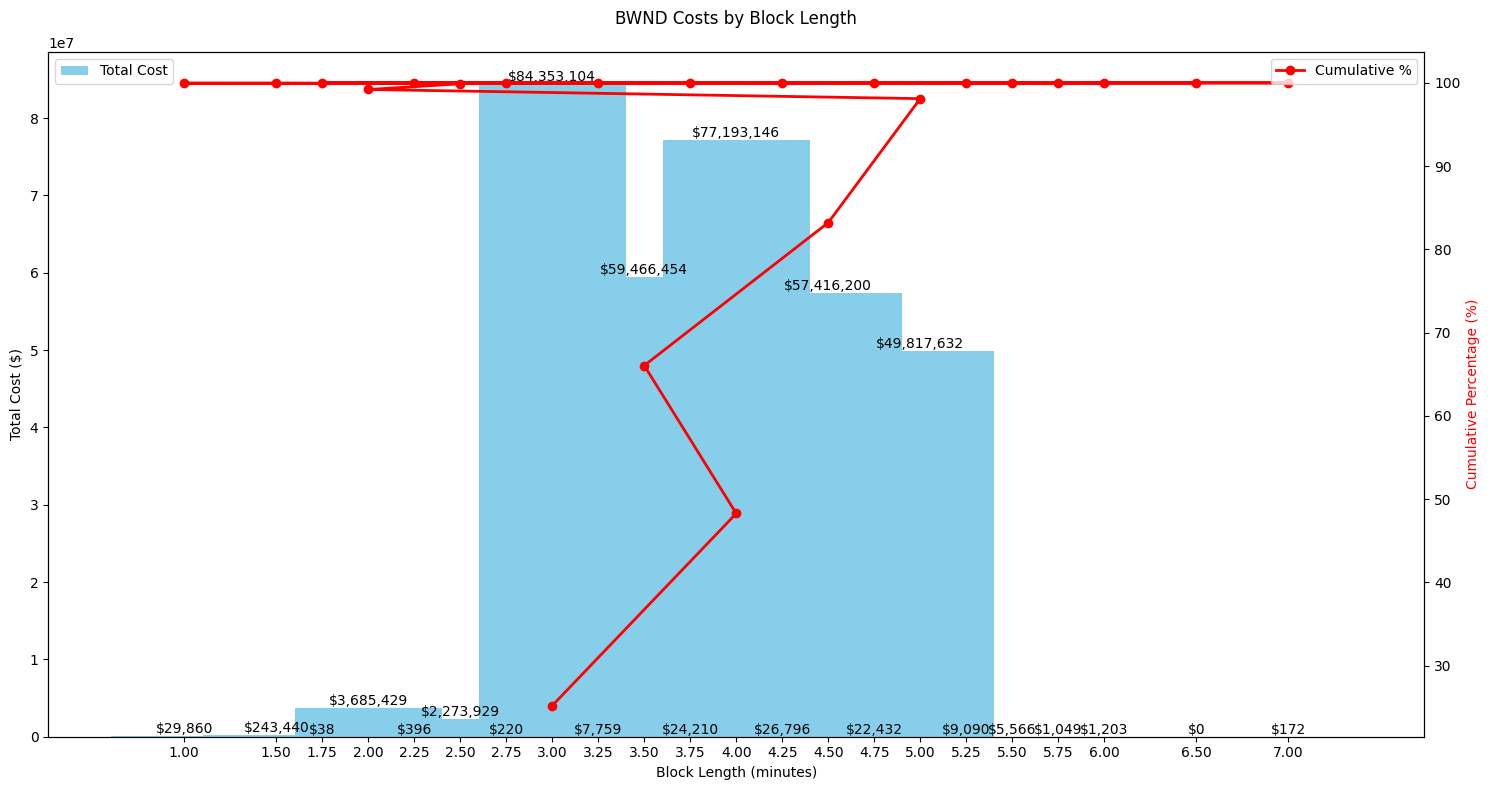

In [34]:

# Run analysis for both metrics
# For BWND
bwnd_analysis = analyze_costs_by_block_length(
    df, 
    metric_column='sum_bwnd_blocks', 
    metric_name='BWND'
)


RLP Cost Analysis by Block Length:
--------------------------------------------------
Total RLP Instances: 1,197,794
Total Cost: $82,282,111.50

Breakdown by Block Length (in minutes):
              avg_metric_rlp_adds        cost  warehouse_id  \
block_length                                                  
4.00                     213249.0  17351580.0        832849   
4.50                     179093.0  16252105.5        791647   
3.00                     214920.0  12770247.0        818775   
3.50                     169761.0  11853327.5        787269   
5.00                     103363.0  10430042.5        535804   
2.00                     220520.0   8827499.0         57604   
2.50                      96888.0   4797310.0         51961   
6.50                          0.0         0.0             2   
6.00                          0.0         0.0           275   
5.75                          0.0         0.0           396   
5.50                          0.0         0.0          130

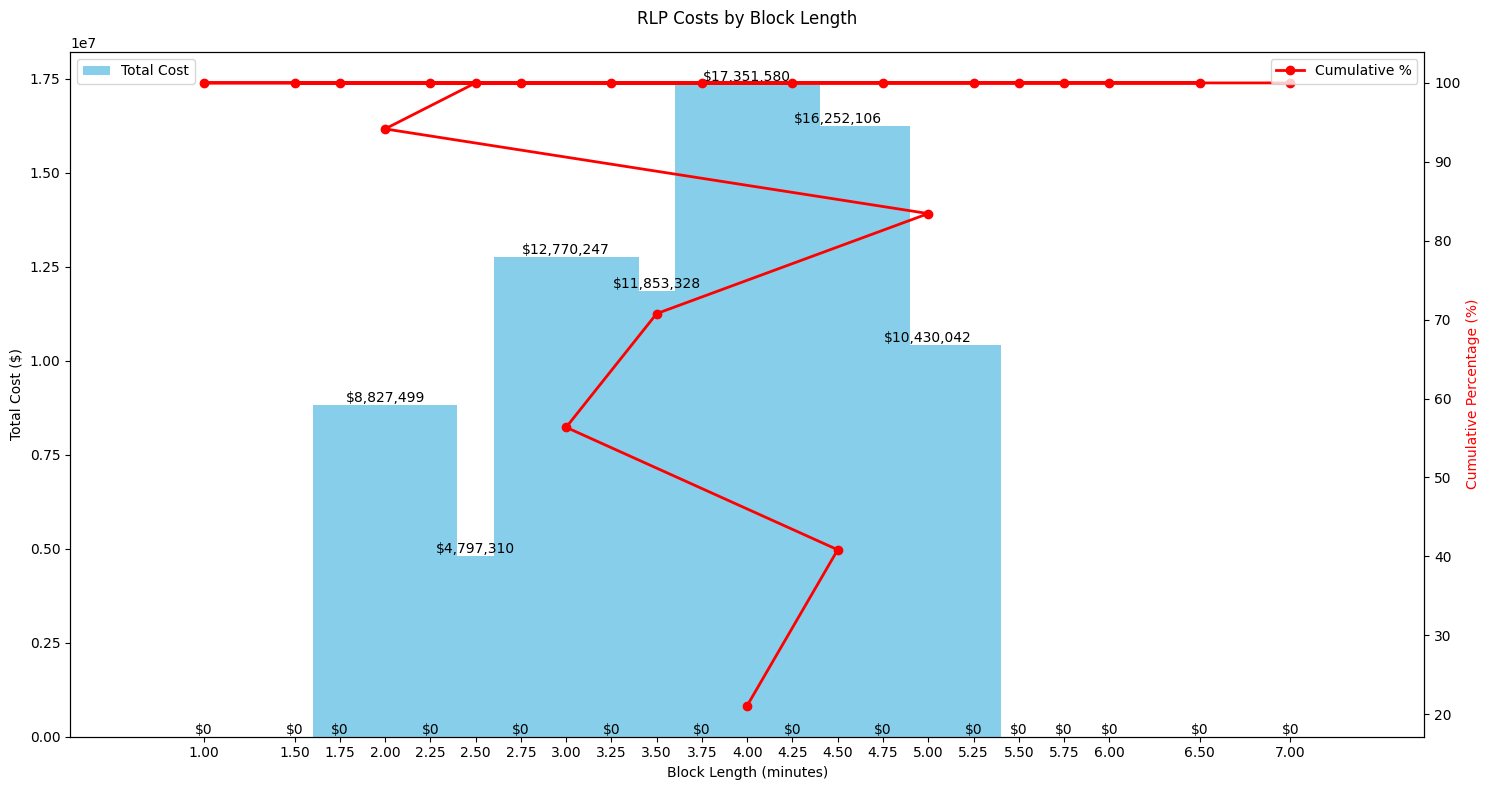

In [35]:

# For RLP
rlp_analysis = analyze_costs_by_block_length(
    df, 
    metric_column='avg_metric_rlp_adds', 
    metric_name='RLP'
)


In [ ]:

# Compare the results
def compare_metrics(bwnd_analysis, rlp_analysis):
    comparison = pd.DataFrame({
        'BWND_Cost': bwnd_analysis['cost'],
        'RLP_Cost': rlp_analysis['cost'],
        'BWND_Percent': bwnd_analysis['percent_of_total_cost'],
        'RLP_Percent': rlp_analysis['percent_of_total_cost']
    })
    
    print("\nComparison of BWND and RLP Costs by Block Length:")
    print("-" * 50)
    print(comparison.sort_values('BWND_Cost', ascending=False))
    
    # Visualization of comparison
    plt.figure(figsize=(15, 8))
    
    x = np.arange(len(comparison.index))
    width = 0.35
    
    plt.bar(x - width/2, comparison['BWND_Cost'], width, label='BWND Cost')
    plt.bar(x + width/2, comparison['RLP_Cost'], width, label='RLP Cost')
    
    plt.xlabel('Block Length (minutes)')
    plt.ylabel('Cost ($)')
    plt.title('Comparison of BWND and RLP Costs by Block Length')
    plt.xticks(x, comparison.index, rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Run comparison
comparison = compare_metrics(bwnd_analysis, rlp_analysis)



Waste Metrics Summary (For RLP=1 and BWND=1 rows only):
--------------------------------------------------
Number of rows analyzed: 120,480
Percentage of total rows: 3.04%

Totals:
Total Preventable Waste: 255,291
Total Total Waste: 536,007
Total Remaining Idle: 280,716
Total Cost Impact Preventable Waste: $17,465,518.75
Total Cost Impact Total Waste: $38,822,616.25

Additional Statistics:
--------------------------------------------------
Average Waste Severity: 79.59%
Median Waste Severity: 100.00%

Top 5 Price Points by Total Waste Cost:
                                  preventable_waste  total_waste  \
guaranteed_earnings_price_per_hr                                   
18.0                                       116503.0       278877   
20.5                                        18345.0        38651   
19.5                                        18390.0        38848   
21.5                                        15164.0        26692   
20.0                                        

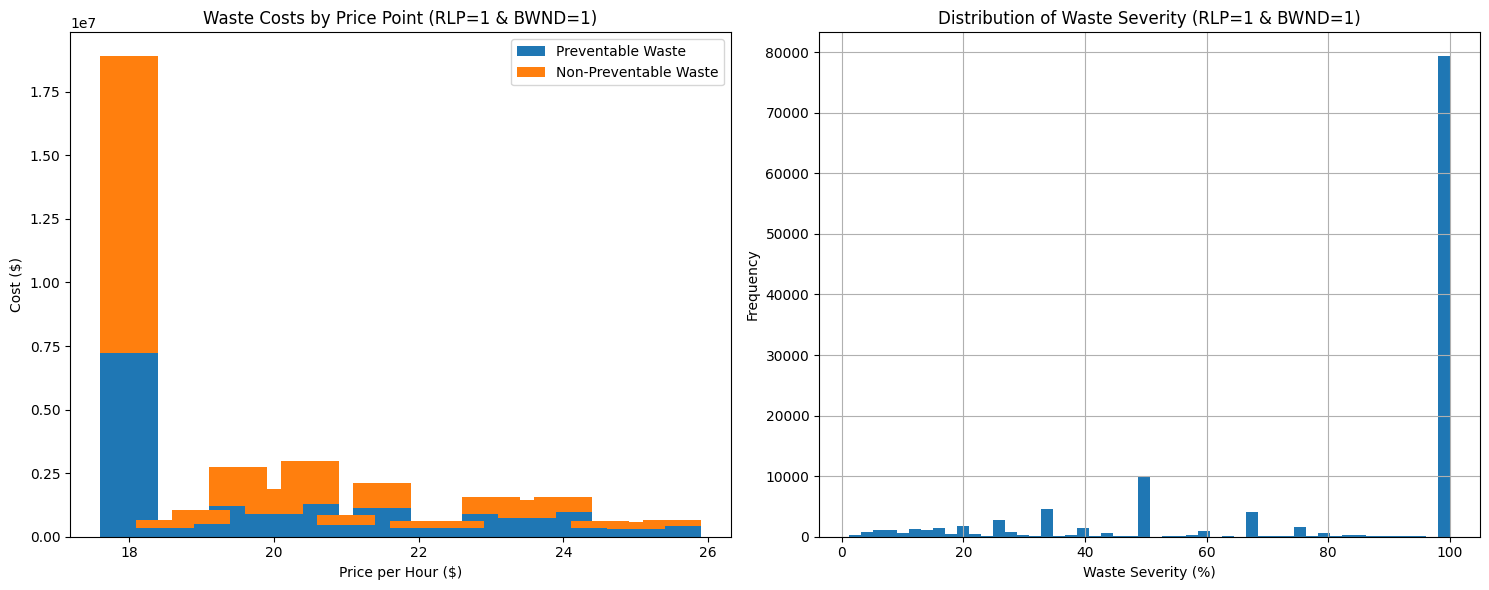

In [ ]:
def calculate_waste_metrics(df):
    # Filter for rows where both RLP = 1 and BWND = 1
    df_waste = df[(df['RLP_happened'] == 1) & (df['BWND_happened'] == 1)].copy()
    
    # Calculate waste metrics
    df_waste['preventable_waste'] = np.minimum(
        df_waste['sum_bwnd_blocks'],
        df_waste['avg_metric_rlp_adds']
    )
    
    df_waste['total_waste'] = df_waste['sum_bwnd_blocks']
    
    df_waste['remaining_idle'] = np.maximum(
        0,
        df_waste['sum_bwnd_blocks'] - df_waste['avg_metric_rlp_adds']
    )
    
    # Calculate waste severity percentage
    df_waste['waste_severity_pct'] = np.where(
        df_waste['avg_metric_rlp_adds'] > 0,
        (df_waste['preventable_waste'] / df_waste['avg_metric_rlp_adds'] * 100).round(2),
        0
    )
    
    # Calculate cost impacts
    df_waste['cost_impact_preventable_waste'] = (
        df_waste['preventable_waste'] * 
        df_waste['guaranteed_earnings_price_per_hr'] * 
        (df_waste['duration'] / 60)
    )
    
    df_waste['cost_impact_total_waste'] = (
        df_waste['total_waste'] * 
        df_waste['guaranteed_earnings_price_per_hr'] * 
        (df_waste['duration'] / 60)
    )
    
    # Calculate totals
    totals = {
        'preventable_waste': df_waste['preventable_waste'].sum(),
        'total_waste': df_waste['total_waste'].sum(),
        'remaining_idle': df_waste['remaining_idle'].sum(),
        'cost_impact_preventable_waste': df_waste['cost_impact_preventable_waste'].sum(),
        'cost_impact_total_waste': df_waste['cost_impact_total_waste'].sum()
    }
    
    # Print results
    print("\nWaste Metrics Summary (For RLP=1 and BWND=1 rows only):")
    print("-" * 50)
    print(f"Number of rows analyzed: {len(df_waste):,}")
    print(f"Percentage of total rows: {(len(df_waste)/len(df)*100):.2f}%")
    print("\nTotals:")
    for key, value in totals.items():
        if 'cost' in key:
            print(f"Total {key.replace('_', ' ').title()}: ${value:,.2f}")
        else:
            print(f"Total {key.replace('_', ' ').title()}: {value:,.0f}")
    
    # Calculate additional statistics
    print("\nAdditional Statistics:")
    print("-" * 50)
    print(f"Average Waste Severity: {df_waste['waste_severity_pct'].mean():.2f}%")
    print(f"Median Waste Severity: {df_waste['waste_severity_pct'].median():.2f}%")
    
    # Group by price point
    price_analysis = df_waste.groupby('guaranteed_earnings_price_per_hr').agg({
        'preventable_waste': 'sum',
        'total_waste': 'sum',
        'cost_impact_preventable_waste': 'sum',
        'cost_impact_total_waste': 'sum'
    }).sort_values('cost_impact_total_waste', ascending=False)
    
    print("\nTop 5 Price Points by Total Waste Cost:")
    print(price_analysis.head())
    
    return {
        'totals': totals,
        'detailed_data': df_waste,
        'price_analysis': price_analysis
    }

# Run the analysis
waste_analysis = calculate_waste_metrics(df)

# Optional: Add visualization
def plot_waste_distribution(analysis):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot cost distribution
    price_data = analysis['price_analysis']
    ax1.bar(price_data.index, price_data['cost_impact_preventable_waste'], 
            label='Preventable Waste')
    ax1.bar(price_data.index, 
            price_data['cost_impact_total_waste'] - price_data['cost_impact_preventable_waste'],
            bottom=price_data['cost_impact_preventable_waste'], 
            label='Non-Preventable Waste')
    ax1.set_title('Waste Costs by Price Point (RLP=1 & BWND=1)')
    ax1.set_xlabel('Price per Hour ($)')
    ax1.set_ylabel('Cost ($)')
    ax1.legend()
    
    # Plot waste severity distribution
    analysis['detailed_data']['waste_severity_pct'].hist(bins=50, ax=ax2)
    ax2.set_title('Distribution of Waste Severity (RLP=1 & BWND=1)')
    ax2.set_xlabel('Waste Severity (%)')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Create visualization
plot_waste_distribution(waste_analysis)


In [ ]:
total_bwnd_blocks_ytd = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)]['sum_bwnd_blocks'].sum()
total_bwnd_blocks_ytd

np.int64(536007)

In [ ]:
total_rlp_blocks_ytd = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)]['avg_metric_rlp_adds'].sum()
total_rlp_blocks_ytd

np.float64(476566.0)

In [ ]:
both_happened = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)]['BWND_happened'].sum()
both_happened

np.int64(120480)

In [ ]:
df_waste = df[(df['RLP_happened'] == 1) & (df['BWND_happened'] == 1)].copy()

In [ ]:
df_waste['total_waste'] = df_waste['sum_bwnd_blocks']

In [ ]:
    
    df_waste['cost_impact_total_waste'] = (
        df_waste['total_waste'] * 
        df_waste['guaranteed_earnings_price_per_hr'] * 
        (df_waste['duration'] / 60)
    )

In [ ]:
totals = {
        'cost_impact_total_waste': df_waste['cost_impact_total_waste'].sum()
    }
totals

{'cost_impact_total_waste': np.float64(38822616.25)}


Waste Metrics Summary (For RLP=1 and BWND=1 rows only):
--------------------------------------------------
Number of rows analyzed: 120,480
Percentage of total rows: 3.04%

Totals:
Total Preventable Waste: 255,291
Total Total Waste: 536,007
Total Remaining Idle: 280,716
Total Cost Impact Preventable Waste: $17,465,518.75
Total Cost Impact Total Waste: $38,822,616.25

Additional Statistics:
--------------------------------------------------
Average Waste Severity: 79.59%
Median Waste Severity: 100.00%

Top 5 Price Points by Total Waste Cost:
                                  preventable_waste  total_waste  \
guaranteed_earnings_price_per_hr                                   
18.0                                       116503.0       278877   
20.5                                        18345.0        38651   
19.5                                        18390.0        38848   
21.5                                        15164.0        26692   
20.0                                        

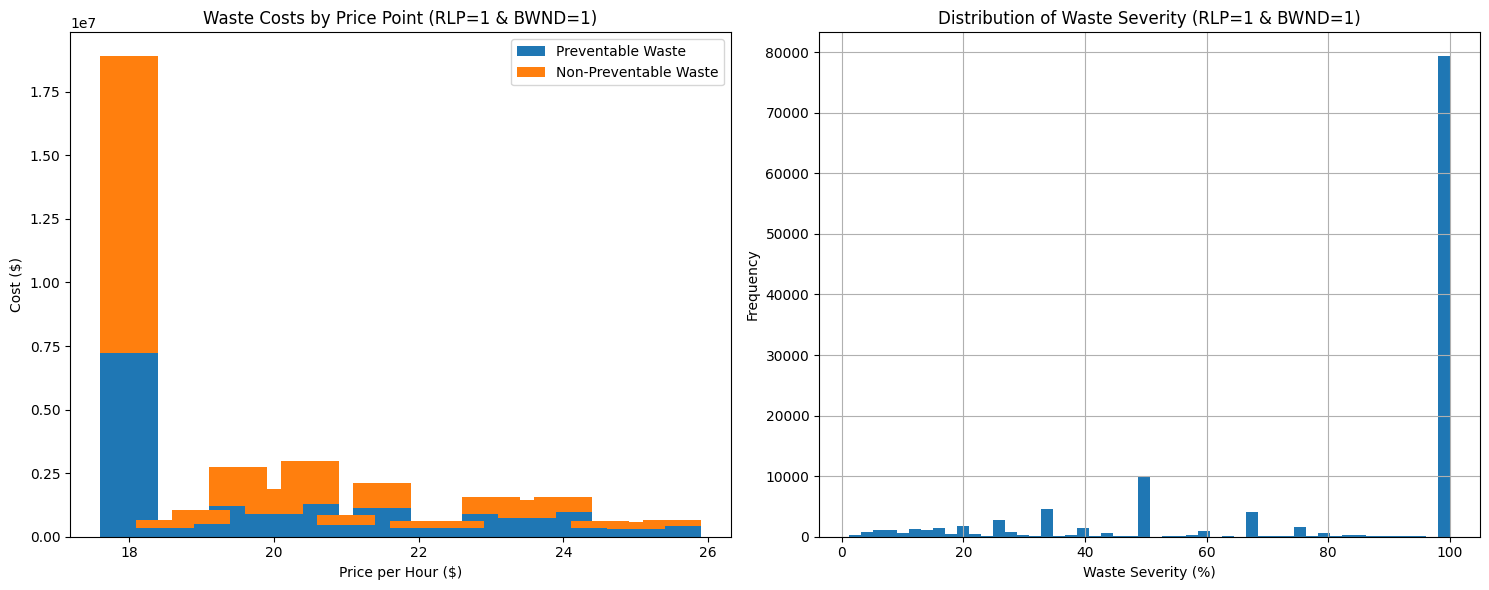

In [ ]:
def calculate_waste_metrics(df):
    # Filter for rows where both RLP = 1 and BWND = 1
    df_waste = df[(df['RLP_happened'] == 1) & (df['BWND_happened'] == 1)].copy()
    
    # Calculate waste metrics
    df_waste['preventable_waste'] = np.minimum(
        df_waste['sum_bwnd_blocks'],
        df_waste['avg_metric_rlp_adds']
    )
    
    df_waste['total_waste'] = df_waste['sum_bwnd_blocks']
    
    df_waste['remaining_idle'] = np.maximum(
        0,
        df_waste['sum_bwnd_blocks'] - df_waste['avg_metric_rlp_adds']
    )
    
    # Calculate waste severity percentage
    df_waste['waste_severity_pct'] = np.where(
        df_waste['avg_metric_rlp_adds'] > 0,
        (df_waste['preventable_waste'] / df_waste['avg_metric_rlp_adds'] * 100).round(2),
        0
    )
    
    # Calculate cost impacts
    df_waste['cost_impact_preventable_waste'] = (
        df_waste['preventable_waste'] * 
        df_waste['guaranteed_earnings_price_per_hr'] * 
        (df_waste['duration'] / 60)
    )
    
    df_waste['cost_impact_total_waste'] = (
        df_waste['total_waste'] * 
        df_waste['guaranteed_earnings_price_per_hr'] * 
        (df_waste['duration'] / 60)
    )
    
    # Calculate totals
    totals = {
        'preventable_waste': df_waste['preventable_waste'].sum(),
        'total_waste': df_waste['total_waste'].sum(),
        'remaining_idle': df_waste['remaining_idle'].sum(),
        'cost_impact_preventable_waste': df_waste['cost_impact_preventable_waste'].sum(),
        'cost_impact_total_waste': df_waste['cost_impact_total_waste'].sum()
    }
    
    # Print results
    print("\nWaste Metrics Summary (For RLP=1 and BWND=1 rows only):")
    print("-" * 50)
    print(f"Number of rows analyzed: {len(df_waste):,}")
    print(f"Percentage of total rows: {(len(df_waste)/len(df)*100):.2f}%")
    print("\nTotals:")
    for key, value in totals.items():
        if 'cost' in key:
            print(f"Total {key.replace('_', ' ').title()}: ${value:,.2f}")
        else:
            print(f"Total {key.replace('_', ' ').title()}: {value:,.0f}")
    
    # Calculate additional statistics
    print("\nAdditional Statistics:")
    print("-" * 50)
    print(f"Average Waste Severity: {df_waste['waste_severity_pct'].mean():.2f}%")
    print(f"Median Waste Severity: {df_waste['waste_severity_pct'].median():.2f}%")
    
    # Group by price point
    price_analysis = df_waste.groupby('guaranteed_earnings_price_per_hr').agg({
        'preventable_waste': 'sum',
        'total_waste': 'sum',
        'cost_impact_preventable_waste': 'sum',
        'cost_impact_total_waste': 'sum'
    }).sort_values('cost_impact_total_waste', ascending=False)
    
    print("\nTop 5 Price Points by Total Waste Cost:")
    print(price_analysis.head())
    
    return {
        'totals': totals,
        'detailed_data': df_waste,
        'price_analysis': price_analysis
    }

# Run the analysis
waste_analysis = calculate_waste_metrics(df)

# Optional: Add visualization
def plot_waste_distribution(analysis):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot cost distribution
    price_data = analysis['price_analysis']
    ax1.bar(price_data.index, price_data['cost_impact_preventable_waste'], 
            label='Preventable Waste')
    ax1.bar(price_data.index, 
            price_data['cost_impact_total_waste'] - price_data['cost_impact_preventable_waste'],
            bottom=price_data['cost_impact_preventable_waste'], 
            label='Non-Preventable Waste')
    ax1.set_title('Waste Costs by Price Point (RLP=1 & BWND=1)')
    ax1.set_xlabel('Price per Hour ($)')
    ax1.set_ylabel('Cost ($)')
    ax1.legend()
    
    # Plot waste severity distribution
    analysis['detailed_data']['waste_severity_pct'].hist(bins=50, ax=ax2)
    ax2.set_title('Distribution of Waste Severity (RLP=1 & BWND=1)')
    ax2.set_xlabel('Waste Severity (%)')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Create visualization
plot_waste_distribution(waste_analysis)



BWND Block Length Distribution (BWND=1):
--------------------------------------------------
Total BWND Blocks: 4,503,109
Number of Different Block Lengths: 21

Breakdown by Block Length (in minutes):
              sum_bwnd_blocks  warehouse_id  percent_of_total
block_length                                                 
3.00                  1381090        351946             30.67
4.00                   972326        265396             21.59
3.50                   849911        276707             18.87
4.50                   647616        226943             14.38
5.00                   503899        173068             11.19
2.00                    91513         27006              2.03
2.50                    46501         14678              1.03
1.50                     7686          2683              0.17
1.00                     1372           789              0.03
3.75                      331           321              0.01
4.25                      325           305            

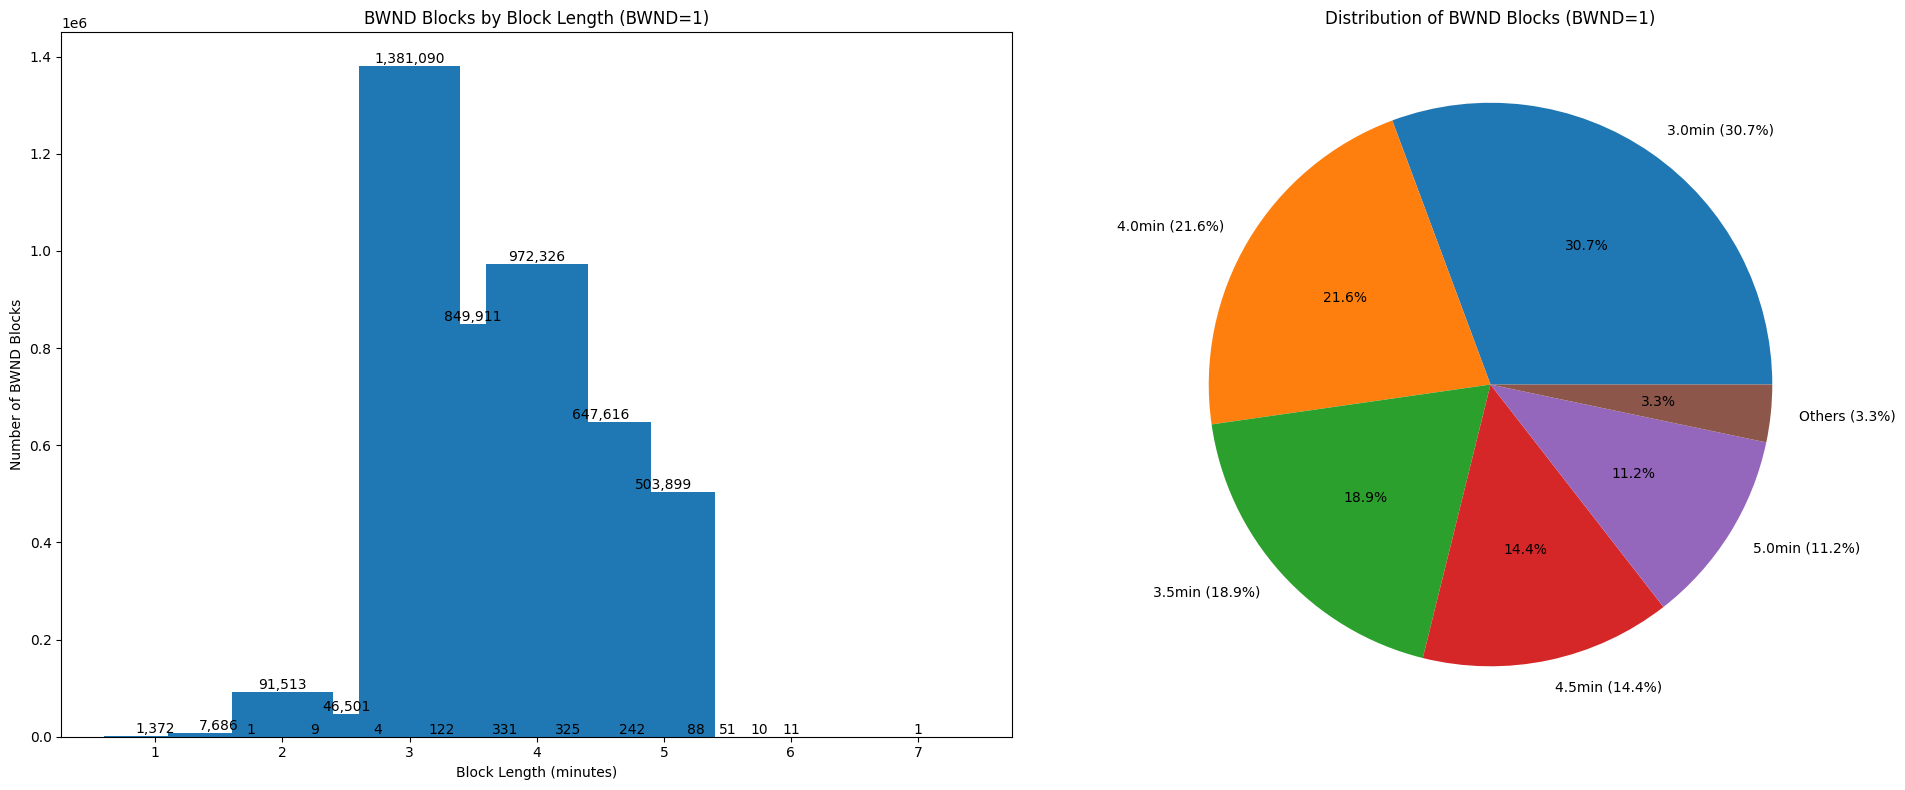


Summary Statistics:
--------------------------------------------------
Most Common Block Length: 3.0 minutes
Percentage of Most Common Length: 30.67%
Top 5 Block Lengths Account for: 96.70%

BWND Block Length Distribution (BWND=1 & RLP=1):
--------------------------------------------------
Total BWND Blocks: 536,007
Number of Different Block Lengths: 7

Breakdown by Block Length (in minutes):
              sum_bwnd_blocks  warehouse_id  percent_of_total
block_length                                                 
4.5                    136123         20451             25.40
4.0                    113389         24810             21.15
3.0                     84692         20334             15.80
3.5                     79945         16837             14.91
2.0                     55982         17173             10.44
5.0                     42499         11736              7.93
2.5                     23377          9139              4.36


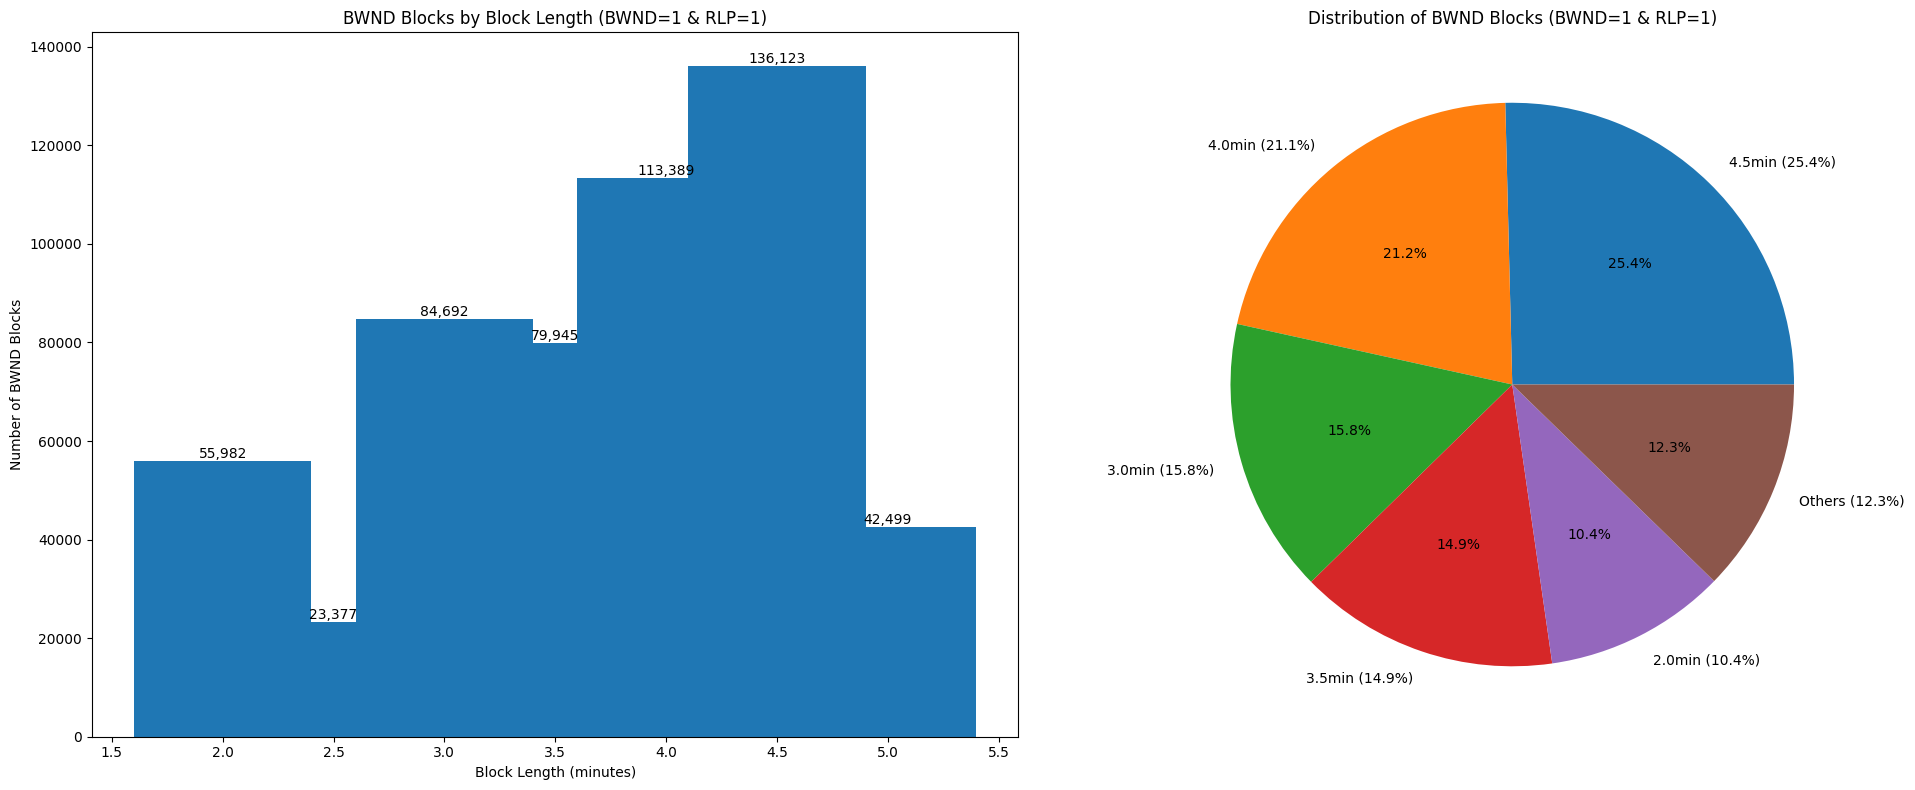


Summary Statistics:
--------------------------------------------------
Most Common Block Length: 4.5 minutes
Percentage of Most Common Length: 25.40%
Top 5 Block Lengths Account for: 87.70%

Comparison of Distributions:
--------------------------------------------------
              BWND_Only_Blocks  BWND_RLP_Blocks  BWND_Only_Percent  \
block_length                                                         
3.00                   1381090          84692.0              30.67   
4.00                    972326         113389.0              21.59   
3.50                    849911          79945.0              18.87   
4.50                    647616         136123.0              14.38   
5.00                    503899          42499.0              11.19   
2.00                     91513          55982.0               2.03   
2.50                     46501          23377.0               1.03   
1.50                      7686              NaN               0.17   
1.00                      13

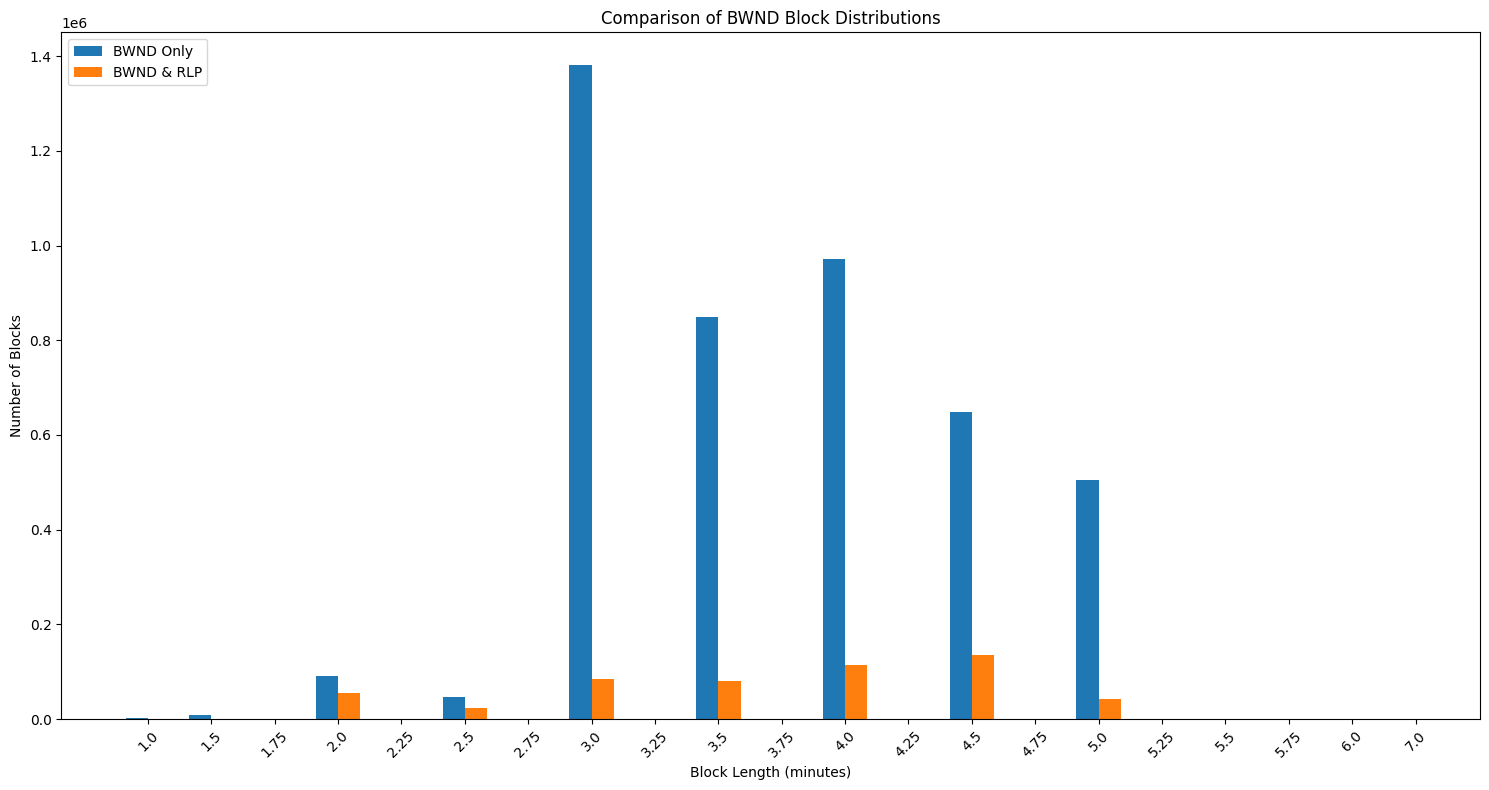

In [ ]:
def analyze_bwnd_length_distribution(df, scenario='bwnd_only'):
    """
    Analyze BWND block length distribution
    """
    # Filter data based on scenario
    if scenario == 'bwnd_only':
        filtered_df = df[df['BWND_happened'] == 1].copy()
        title_prefix = "BWND=1"
    else:
        filtered_df = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)].copy()
        title_prefix = "BWND=1 & RLP=1"
    
    # Group by block length
    length_distribution = filtered_df.groupby('block_length').agg({
        'sum_bwnd_blocks': 'sum',
        'warehouse_id': 'count'
    }).round(2)
    
    # Calculate percentages
    length_distribution['percent_of_total'] = (
        (length_distribution['sum_bwnd_blocks'] / length_distribution['sum_bwnd_blocks'].sum()) * 100
    ).round(2)
    
    # Sort by number of blocks
    length_distribution = length_distribution.sort_values('sum_bwnd_blocks', ascending=False)
    
    # Print results
    print(f"\nBWND Block Length Distribution ({title_prefix}):")
    print("-" * 50)
    print(f"Total BWND Blocks: {length_distribution['sum_bwnd_blocks'].sum():,.0f}")
    print(f"Number of Different Block Lengths: {len(length_distribution)}")
    print("\nBreakdown by Block Length (in minutes):")
    print(length_distribution)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Bar plot
    bars = ax1.bar(length_distribution.index, length_distribution['sum_bwnd_blocks'])
    ax1.set_title(f'BWND Blocks by Block Length ({title_prefix})')
    ax1.set_xlabel('Block Length (minutes)')
    ax1.set_ylabel('Number of BWND Blocks')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom')
    
    # Pie chart for top 5 block lengths
    top_5 = length_distribution.head()
    others_sum = length_distribution.iloc[5:]['sum_bwnd_blocks'].sum()
    others_percent = length_distribution.iloc[5:]['percent_of_total'].sum()
    
    # Create pie data using concat
    pie_data = pd.concat([
        top_5['sum_bwnd_blocks'],
        pd.Series({'Others': others_sum})
    ])
    
    pie_labels = [f'{idx}min ({val:.1f}%)' for idx, val in 
                 zip(top_5.index, top_5['percent_of_total'])]
    pie_labels.append(f'Others ({others_percent:.1f}%)')
    
    ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
    ax2.set_title(f'Distribution of BWND Blocks ({title_prefix})')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print("\nSummary Statistics:")
    print("-" * 50)
    print(f"Most Common Block Length: {length_distribution.index[0]} minutes")
    print(f"Percentage of Most Common Length: {length_distribution['percent_of_total'].iloc[0]:.2f}%")
    print(f"Top 5 Block Lengths Account for: {length_distribution['percent_of_total'].head().sum():.2f}%")
    
    return length_distribution

# Run analysis for both scenarios
# BWND = 1
bwnd_only_dist = analyze_bwnd_length_distribution(df, 'bwnd_only')

# BWND = 1 & RLP = 1
bwnd_rlp_dist = analyze_bwnd_length_distribution(df, 'bwnd_rlp')

# Compare the distributions
def compare_distributions(bwnd_only_dist, bwnd_rlp_dist):
    comparison = pd.DataFrame({
        'BWND_Only_Blocks': bwnd_only_dist['sum_bwnd_blocks'],
        'BWND_RLP_Blocks': bwnd_rlp_dist['sum_bwnd_blocks'],
        'BWND_Only_Percent': bwnd_only_dist['percent_of_total'],
        'BWND_RLP_Percent': bwnd_rlp_dist['percent_of_total']
    })
    
    print("\nComparison of Distributions:")
    print("-" * 50)
    print(comparison.sort_values('BWND_Only_Blocks', ascending=False))
    
    # Visualization of comparison
    plt.figure(figsize=(15, 8))
    
    x = np.arange(len(comparison.index))
    width = 0.35
    
    plt.bar(x - width/2, comparison['BWND_Only_Blocks'], width, label='BWND Only')
    plt.bar(x + width/2, comparison['BWND_RLP_Blocks'], width, label='BWND & RLP')
    
    plt.xlabel('Block Length (minutes)')
    plt.ylabel('Number of Blocks')
    plt.title('Comparison of BWND Block Distributions')
    plt.xticks(x, comparison.index, rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Run comparison
comparison = compare_distributions(bwnd_only_dist, bwnd_rlp_dist)



BWND Block Length Distribution (BWND=1):
--------------------------------------------------
Total BWND Blocks: 4,503,109
Number of Different Block Lengths: 21

Breakdown by Block Length (in minutes):
              sum_bwnd_blocks  warehouse_id  percent_of_total
block_length                                                 
3.00                  1381090        351946             30.67
4.00                   972326        265396             21.59
3.50                   849911        276707             18.87
4.50                   647616        226943             14.38
5.00                   503899        173068             11.19
2.00                    91513         27006              2.03
2.50                    46501         14678              1.03
1.50                     7686          2683              0.17
1.00                     1372           789              0.03
3.75                      331           321              0.01
4.25                      325           305            

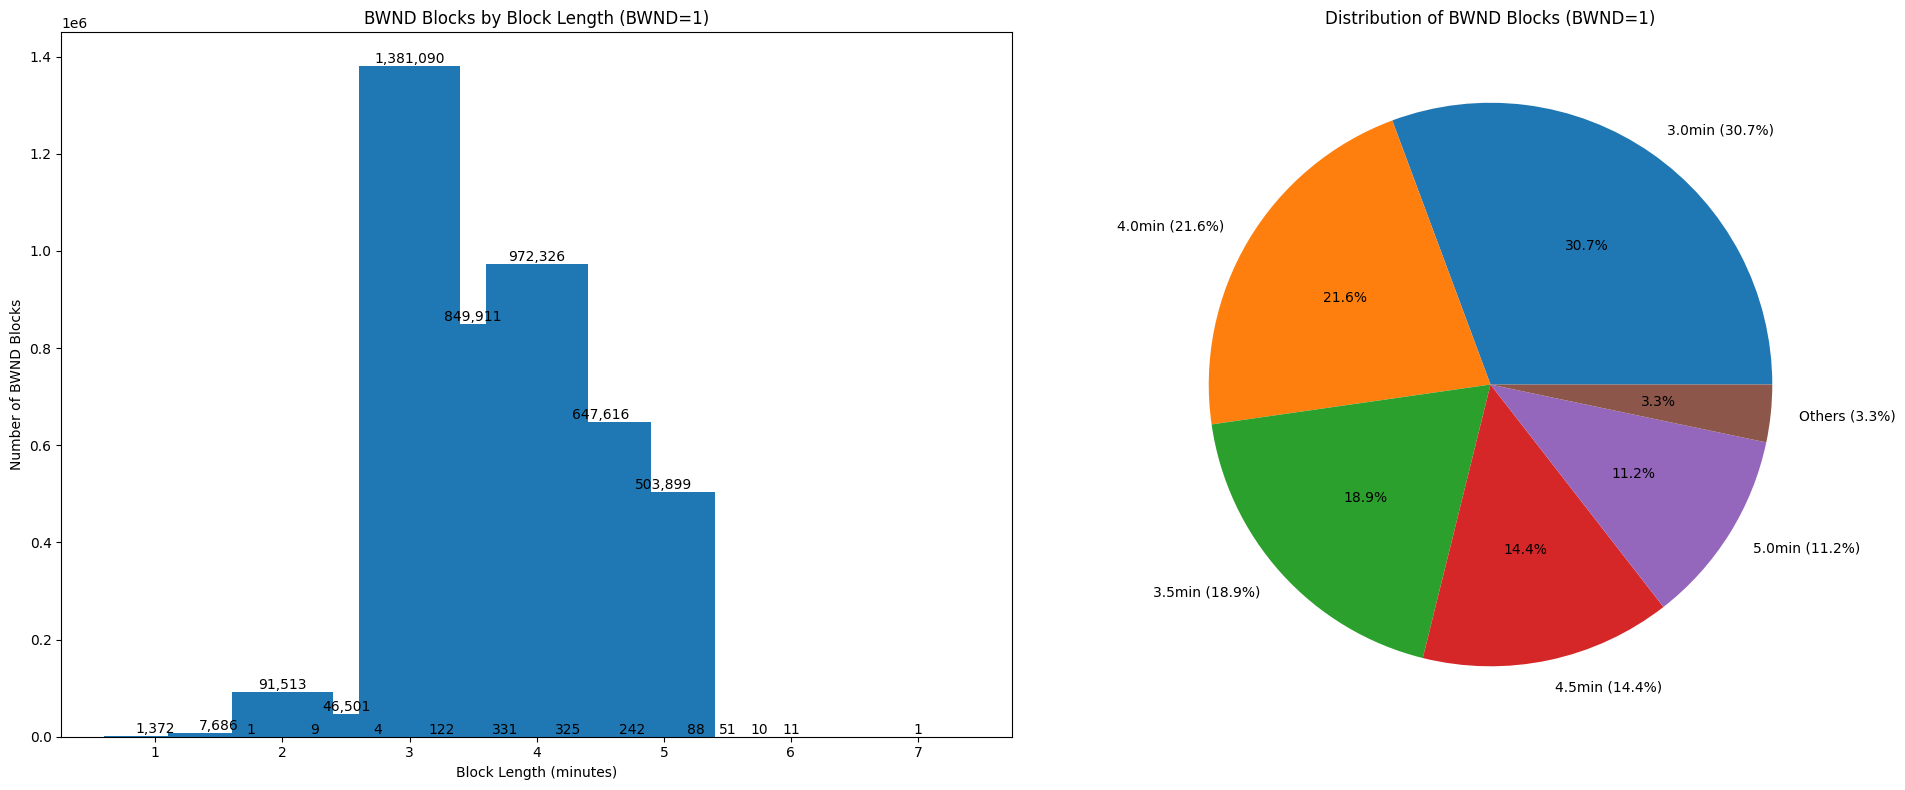


Summary Statistics:
--------------------------------------------------
Most Common Block Length: 3.0 minutes
Percentage of Most Common Length: 30.67%
Top 5 Block Lengths Account for: 96.70%

BWND Block Length Distribution (BWND=1 & RLP=1):
--------------------------------------------------
Total BWND Blocks: 536,007
Number of Different Block Lengths: 7

Breakdown by Block Length (in minutes):
              sum_bwnd_blocks  warehouse_id  percent_of_total
block_length                                                 
4.5                    136123         20451             25.40
4.0                    113389         24810             21.15
3.0                     84692         20334             15.80
3.5                     79945         16837             14.91
2.0                     55982         17173             10.44
5.0                     42499         11736              7.93
2.5                     23377          9139              4.36


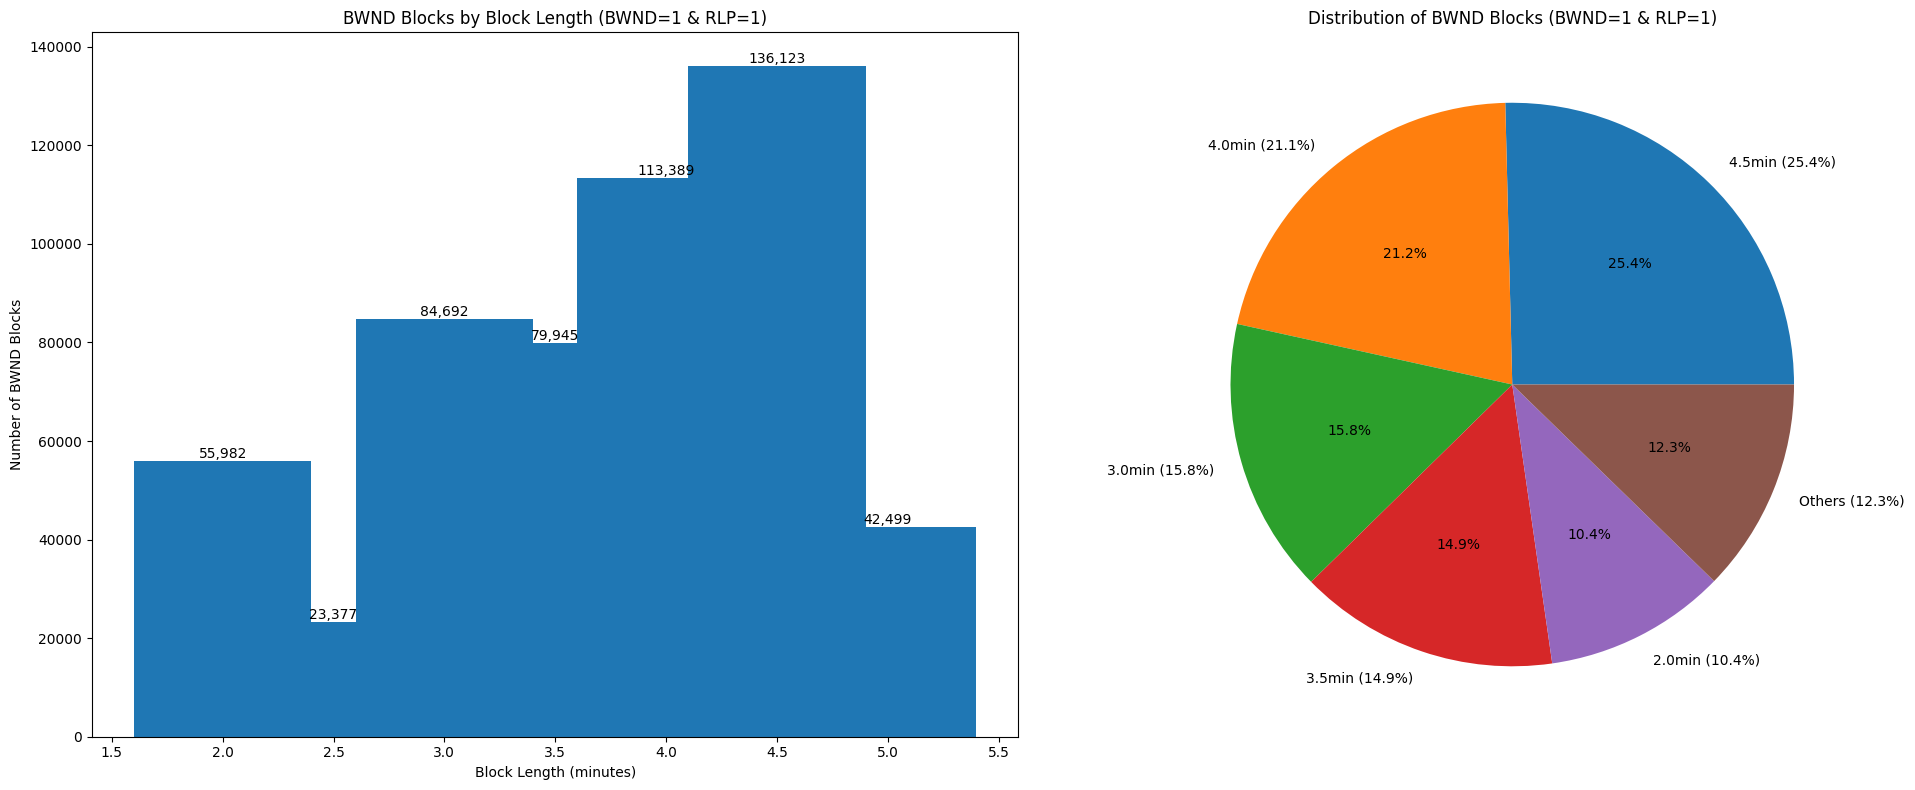


Summary Statistics:
--------------------------------------------------
Most Common Block Length: 4.5 minutes
Percentage of Most Common Length: 25.40%
Top 5 Block Lengths Account for: 87.70%

Comparison of Distributions:
--------------------------------------------------
              BWND_Only_Blocks  BWND_RLP_Blocks  BWND_Only_Percent  \
block_length                                                         
3.00                   1381090          84692.0              30.67   
4.00                    972326         113389.0              21.59   
3.50                    849911          79945.0              18.87   
4.50                    647616         136123.0              14.38   
5.00                    503899          42499.0              11.19   
2.00                     91513          55982.0               2.03   
2.50                     46501          23377.0               1.03   
1.50                      7686              NaN               0.17   
1.00                      13

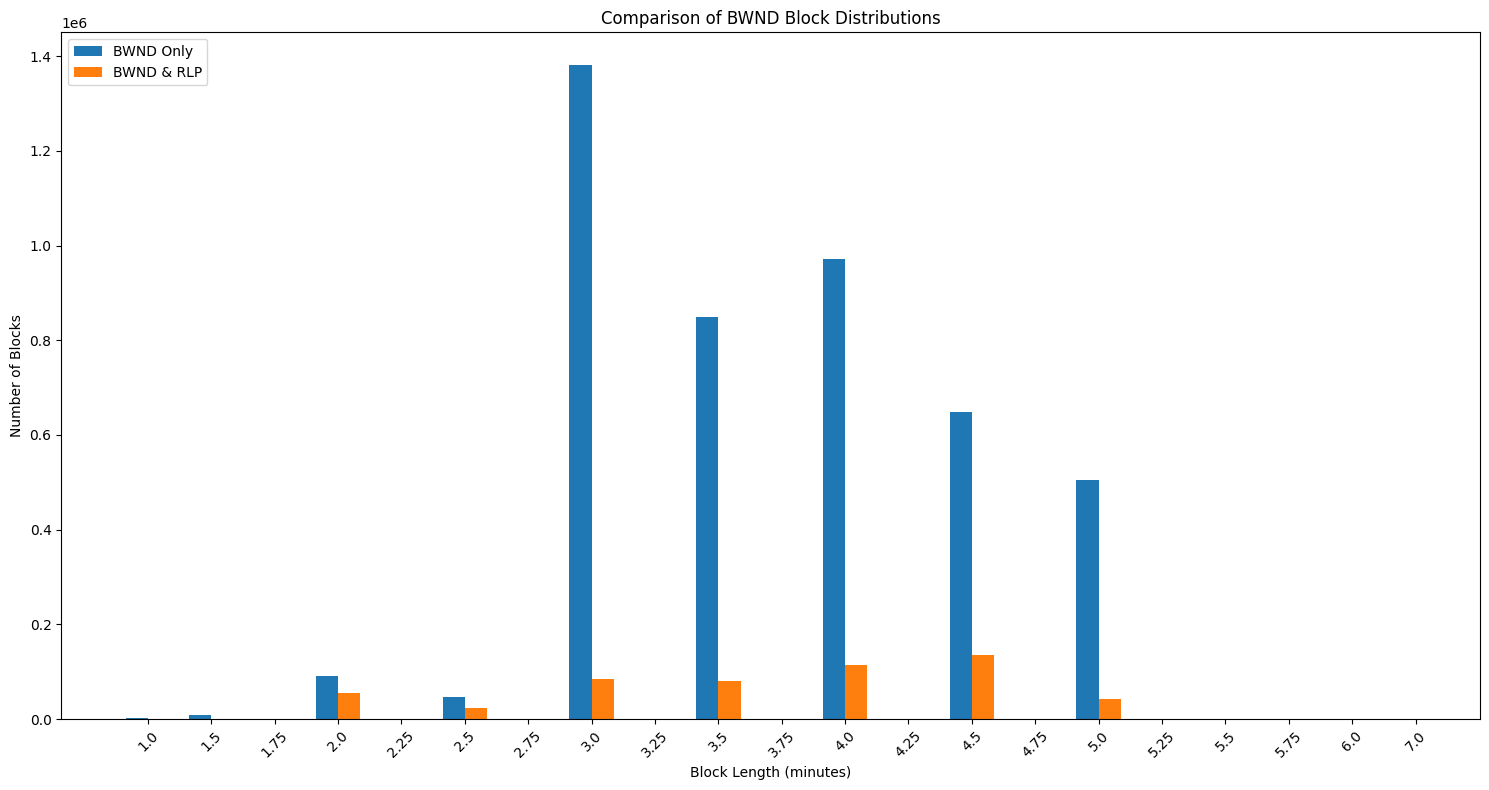

In [ ]:
def analyze_bwnd_length_distribution(df, scenario='bwnd_only'):
    """
    Analyze BWND block length distribution
    """
    # Filter data based on scenario
    if scenario == 'bwnd_only':
        filtered_df = df[df['BWND_happened'] == 1].copy()
        title_prefix = "BWND=1"
    else:
        filtered_df = df[(df['BWND_happened'] == 1) & (df['RLP_happened'] == 1)].copy()
        title_prefix = "BWND=1 & RLP=1"
    
    # Group by block length
    length_distribution = filtered_df.groupby('block_length').agg({
        'sum_bwnd_blocks': 'sum',
        'warehouse_id': 'count'
    }).round(2)
    
    # Calculate percentages
    length_distribution['percent_of_total'] = (
        (length_distribution['sum_bwnd_blocks'] / length_distribution['sum_bwnd_blocks'].sum()) * 100
    ).round(2)
    
    # Sort by number of blocks
    length_distribution = length_distribution.sort_values('sum_bwnd_blocks', ascending=False)
    
    # Print results
    print(f"\nBWND Block Length Distribution ({title_prefix}):")
    print("-" * 50)
    print(f"Total BWND Blocks: {length_distribution['sum_bwnd_blocks'].sum():,.0f}")
    print(f"Number of Different Block Lengths: {len(length_distribution)}")
    print("\nBreakdown by Block Length (in minutes):")
    print(length_distribution)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Bar plot
    bars = ax1.bar(length_distribution.index, length_distribution['sum_bwnd_blocks'])
    ax1.set_title(f'BWND Blocks by Block Length ({title_prefix})')
    ax1.set_xlabel('Block Length (minutes)')
    ax1.set_ylabel('Number of BWND Blocks')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom')
    
    # Pie chart for top 5 block lengths
    top_5 = length_distribution.head()
    others_sum = length_distribution.iloc[5:]['sum_bwnd_blocks'].sum()
    others_percent = length_distribution.iloc[5:]['percent_of_total'].sum()
    
    # Create pie data using concat
    pie_data = pd.concat([
        top_5['sum_bwnd_blocks'],
        pd.Series({'Others': others_sum})
    ])
    
    pie_labels = [f'{idx}min ({val:.1f}%)' for idx, val in 
                 zip(top_5.index, top_5['percent_of_total'])]
    pie_labels.append(f'Others ({others_percent:.1f}%)')
    
    ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
    ax2.set_title(f'Distribution of BWND Blocks ({title_prefix})')
    
    plt.tight_layout()
    plt.show()
    
    # Additional statistics
    print("\nSummary Statistics:")
    print("-" * 50)
    print(f"Most Common Block Length: {length_distribution.index[0]} minutes")
    print(f"Percentage of Most Common Length: {length_distribution['percent_of_total'].iloc[0]:.2f}%")
    print(f"Top 5 Block Lengths Account for: {length_distribution['percent_of_total'].head().sum():.2f}%")
    
    return length_distribution

# Run analysis for both scenarios
# BWND = 1
bwnd_only_dist = analyze_bwnd_length_distribution(df, 'bwnd_only')

# BWND = 1 & RLP = 1
bwnd_rlp_dist = analyze_bwnd_length_distribution(df, 'bwnd_rlp')

# Compare the distributions
def compare_distributions(bwnd_only_dist, bwnd_rlp_dist):
    comparison = pd.DataFrame({
        'BWND_Only_Blocks': bwnd_only_dist['sum_bwnd_blocks'],
        'BWND_RLP_Blocks': bwnd_rlp_dist['sum_bwnd_blocks'],
        'BWND_Only_Percent': bwnd_only_dist['percent_of_total'],
        'BWND_RLP_Percent': bwnd_rlp_dist['percent_of_total']
    })
    
    print("\nComparison of Distributions:")
    print("-" * 50)
    print(comparison.sort_values('BWND_Only_Blocks', ascending=False))
    
    # Visualization of comparison
    plt.figure(figsize=(15, 8))
    
    x = np.arange(len(comparison.index))
    width = 0.35
    
    plt.bar(x - width/2, comparison['BWND_Only_Blocks'], width, label='BWND Only')
    plt.bar(x + width/2, comparison['BWND_RLP_Blocks'], width, label='BWND & RLP')
    
    plt.xlabel('Block Length (minutes)')
    plt.ylabel('Number of Blocks')
    plt.title('Comparison of BWND Block Distributions')
    plt.xticks(x, comparison.index, rotation=45)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Run comparison
comparison = compare_distributions(bwnd_only_dist, bwnd_rlp_dist)
